In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#표 한글, 음수표현 처리
import matplotlib
import matplotlib.font_manager as fm
font_location = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font',family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
# vscode) hide panel : ctrl + J

In [7]:
BBC = pd.read_csv('../result_beauty_brand_category_0625_.csv')
BBP = pd.read_csv('../result_beauty_brand_product_name_0625_.csv')
BP = pd.read_csv('../result_beauty_product_name_0625_.csv')

# All Brand Category
'브랜드명'과'품목'으로 구성된 Dataframe

In [9]:
BBC.head()

,Unnamed: 0,코스알엑스 토너_0,코스알엑스 토너_1,더랩 바이 블랑두 패드_0,더랩 바이 블랑두 패드_1,프레쥬 토너_0,프레쥬 토너_1,스팀베이스 패드_0,스팀베이스 패드_1,더모테라피 토너_0,...,페리페라 팔레트_0,페리페라 팔레트_1,아임미미 큐브_0,아임미미 큐브_1,16BRAND 매거진_0,16BRAND 매거진_1,라카 팔레트_0,라카 팔레트_1,NYX 내추럴룩키트_0,NYX 내추럴룩키트_1
0,0,11.34020,46.05263,3.44827,76.76056,40.81632,11.57894,0.0,0.0,1.29589,...,6.38297,8.82978,94.11764,0.00000,0.0,0.0,50.84745,12.82051,0.0,0.0
1,1,15.46391,47.36842,2.15517,76.76056,0.00000,22.63157,0.0,0.0,0.00000,...,5.31914,7.44680,100.00000,0.00000,0.0,0.0,40.67796,25.64102,0.0,0.0
2,2,55.67010,36.84210,0.00000,100.00000,0.00000,15.26315,0.0,0.0,1.07991,...,6.17021,6.06382,35.29411,0.00000,0.0,0.0,57.62711,11.53846,0.0,0.0
3,3,23.71134,31.57894,0.00000,95.07042,91.83673,9.47368,0.0,0.0,0.64794,...,5.31914,5.95744,35.29411,9.67741,0.0,0.0,38.98305,15.38461,0.0,0.0
4,4,10.30927,38.15789,0.00000,64.08450,12.24489,19.47368,0.0,0.0,0.75593,...,7.34042,6.70212,52.94117,8.06451,0.0,0.0,47.45762,14.10256,0.0,0.0


In [10]:
BBC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 2797 entries, Unnamed: 0 to NYX 내추럴룩키트_1
dtypes: float64(2796), int64(1)
memory usage: 1.3 MB


# 아래로는 PPL틀 ( 진 행 중  . . . )

In [13]:
sum(ABC.isnull().sum())

0

In [14]:
# row별(446개) 평균 컬럼 추가

Row_mean = []
for i in range(0,len(ABC.index)):
    Row_mean.append(ABC.iloc[i].mean())
Row_mean = pd.DataFrame(Row_mean)
ABC['Row_mean'] = Row_mean

ABC.columns


Index(['Unnamed: 0', '아제린 미스트', '알도 구두', '라디안큐바이오 오일', '프레드릭 콘스탄트 시계',
       '루핏 티셔츠', '클럽 모나코 자켓', '아워글래스 하이라이터', '캘빈클라인 가방', '스케쳐스 운동화',
       ...
       '리타모니카 목걸이', '티에르 귀걸이', '티에르 귀걸이.1', '쌤소나이트 캐리어', '웻앤와일드 하이라이터',
       '킵쿨 에센스', '아디다스 팬츠', '프론트로우 자켓', '미카코 뷰티용품', 'Row_mean'],
      dtype='object', length=423)

In [15]:
# 이격도 제작('avg_5')
# ['Row_mean']의 5일간격(해당일 전5일) 평균치

avg_5 = []
for i in range(0,len(ABC['Row_mean'])):
    avg_5.append(ABC['Row_mean'][i-5:i].mean())
avg_5 = pd.DataFrame(avg_5)
avg_5.head(10)
ABC['avg_5'] = avg_5

ABC.columns

Index(['Unnamed: 0', '아제린 미스트', '알도 구두', '라디안큐바이오 오일', '프레드릭 콘스탄트 시계',
       '루핏 티셔츠', '클럽 모나코 자켓', '아워글래스 하이라이터', '캘빈클라인 가방', '스케쳐스 운동화',
       ...
       '티에르 귀걸이', '티에르 귀걸이.1', '쌤소나이트 캐리어', '웻앤와일드 하이라이터', '킵쿨 에센스', '아디다스 팬츠',
       '프론트로우 자켓', '미카코 뷰티용품', 'Row_mean', 'avg_5'],
      dtype='object', length=424)

In [16]:
# 이격도 제작('avb_10')
# ['Row_mean']의 10일간격(해당일 전후5일) 평균치

avg_10 = []
for i in range(0,len(ABC['Row_mean'])):
    avg_10.append(ABC['Row_mean'][i-5:i+5].mean())
avg_10 = pd.DataFrame(avg_10)
avg_10.head(10)
ABC['avg_10'] = avg_10
ABC['avg_10'][56:61] = np.nan

ABC.columns

Index(['Unnamed: 0', '아제린 미스트', '알도 구두', '라디안큐바이오 오일', '프레드릭 콘스탄트 시계',
       '루핏 티셔츠', '클럽 모나코 자켓', '아워글래스 하이라이터', '캘빈클라인 가방', '스케쳐스 운동화',
       ...
       '티에르 귀걸이.1', '쌤소나이트 캐리어', '웻앤와일드 하이라이터', '킵쿨 에센스', '아디다스 팬츠',
       '프론트로우 자켓', '미카코 뷰티용품', 'Row_mean', 'avg_5', 'avg_10'],
      dtype='object', length=425)

In [17]:
# 방영일자(0~60)을 (-30~0~30) 으로 변경
ABC.index = np.arange(-30,31)
ABC.head()

# DB에서 불러올 시 삭제할 수 있는 셀.

,Unnamed: 0,아제린 미스트,알도 구두,라디안큐바이오 오일,프레드릭 콘스탄트 시계,루핏 티셔츠,클럽 모나코 자켓,아워글래스 하이라이터,캘빈클라인 가방,스케쳐스 운동화,...,티에르 귀걸이.1,쌤소나이트 캐리어,웻앤와일드 하이라이터,킵쿨 에센스,아디다스 팬츠,프론트로우 자켓,미카코 뷰티용품,Row_mean,avg_5,avg_10
-30,0,0,63.10160,0,23.68421,0,74.57627,68.75,100.00000,79.46713,...,0,64.58546,44.82758,0,65.21739,70,0,35.009665,NaN,NaN
-29,1,0,65.77540,0,42.10526,0,84.74576,81.25,81.50684,92.64407,...,0,79.42681,44.82758,0,64.59627,100,0,36.486401,NaN,NaN
-28,2,0,88.77005,0,50.00000,0,81.35593,31.25,76.48401,79.00376,...,0,81.88331,41.37931,0,52.79503,100,0,34.596006,NaN,NaN
-27,3,0,82.88770,0,42.10526,0,62.71186,31.25,64.15525,74.22531,...,0,70.62436,65.51724,0,55.59006,86,0,33.240793,NaN,NaN
-26,4,0,88.77005,0,65.78947,0,64.40677,81.25,59.13242,70.22878,...,0,62.53838,100.00000,0,46.27329,80,0,34.049356,NaN,NaN


---
# chart 출력
* 데이터 정규분포 확인
* 이격도 제작(avg_5, avg_10)
* 'Row_mean'과 이격도 그래프
* 

In [18]:
# 
x = np.linspace(19.23960716587681, 42.953949137440745, 101)   # x 정의
x

array([19.23960717, 19.47675059, 19.71389401, 19.95103743, 20.18818084,
       20.42532426, 20.66246768, 20.8996111 , 21.13675452, 21.37389794,
       21.61104136, 21.84818478, 22.0853282 , 22.32247162, 22.55961504,
       22.79675846, 23.03390188, 23.2710453 , 23.50818872, 23.74533214,
       23.98247556, 24.21961898, 24.4567624 , 24.69390582, 24.93104924,
       25.16819266, 25.40533608, 25.6424795 , 25.87962292, 26.11676634,
       26.35390976, 26.59105318, 26.8281966 , 27.06534002, 27.30248344,
       27.53962686, 27.77677028, 28.0139137 , 28.25105712, 28.48820053,
       28.72534395, 28.96248737, 29.19963079, 29.43677421, 29.67391763,
       29.91106105, 30.14820447, 30.38534789, 30.62249131, 30.85963473,
       31.09677815, 31.33392157, 31.57106499, 31.80820841, 32.04535183,
       32.28249525, 32.51963867, 32.75678209, 32.99392551, 33.23106893,
       33.46821235, 33.70535577, 33.94249919, 34.17964261, 34.41678603,
       34.65392945, 34.89107287, 35.12821629, 35.36535971, 35.60

In [19]:
y = (1 / np.sqrt(2 * np.pi)) * np.exp(- x ** 2 / 2 )
y

array([1.66397955e-081, 1.68829222e-083, 1.61928703e-085, 1.46817097e-087,
       1.25836321e-089, 1.01955808e-091, 7.80898355e-094, 5.65397166e-096,
       3.86980719e-098, 2.50381137e-100, 1.53140644e-102, 8.85433421e-105,
       4.83947146e-107, 2.50044056e-109, 1.22127008e-111, 5.63875834e-114,
       2.46111455e-116, 1.01544581e-118, 3.96057515e-121, 1.46028070e-123,
       5.08968624e-126, 1.67695828e-128, 5.22312099e-131, 1.53785183e-133,
       4.28031256e-136, 1.12619359e-138, 2.80109090e-141, 6.58594248e-144,
       1.46381180e-146, 3.07559493e-149, 6.10871141e-152, 1.14695575e-154,
       2.03573055e-157, 3.41562756e-160, 5.41747984e-163, 8.12270496e-166,
       1.15127914e-168, 1.54254261e-171, 1.95375583e-174, 2.33926803e-177,
       2.64768468e-180, 2.83288615e-183, 2.86528985e-186, 2.73958374e-189,
       2.47615132e-192, 2.11566237e-195, 1.70880349e-198, 1.30471142e-201,
       9.41701771e-205, 6.42523313e-208, 4.14420255e-211, 2.52679284e-214,
       1.45638059e-217, 7

In [20]:
ABC['Row_mean'].describe()

count    61.000000
mean     30.417727
std       2.668974
min      25.707155
25%      28.409523
50%      30.157587
75%      33.012111
max      36.486401
Name: Row_mean, dtype: float64

(array([ 5.,  7.,  7., 11.,  9.,  5.,  4.,  7.,  5.,  1.]),
 array([25.70715498, 26.78507961, 27.86300425, 28.94092888, 30.01885352,
        31.09677815, 32.17470279, 33.25262742, 34.33055206, 35.40847669,
        36.48640133]),
 <a list of 10 Patch objects>)

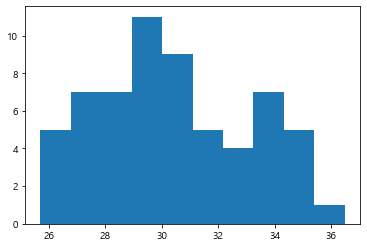

In [21]:
plt.hist(ABC['Row_mean'],histtype='bar')

(19.23960716587681, 42.953949137440745, -0.006838453670831124, 0.14361072560418725)


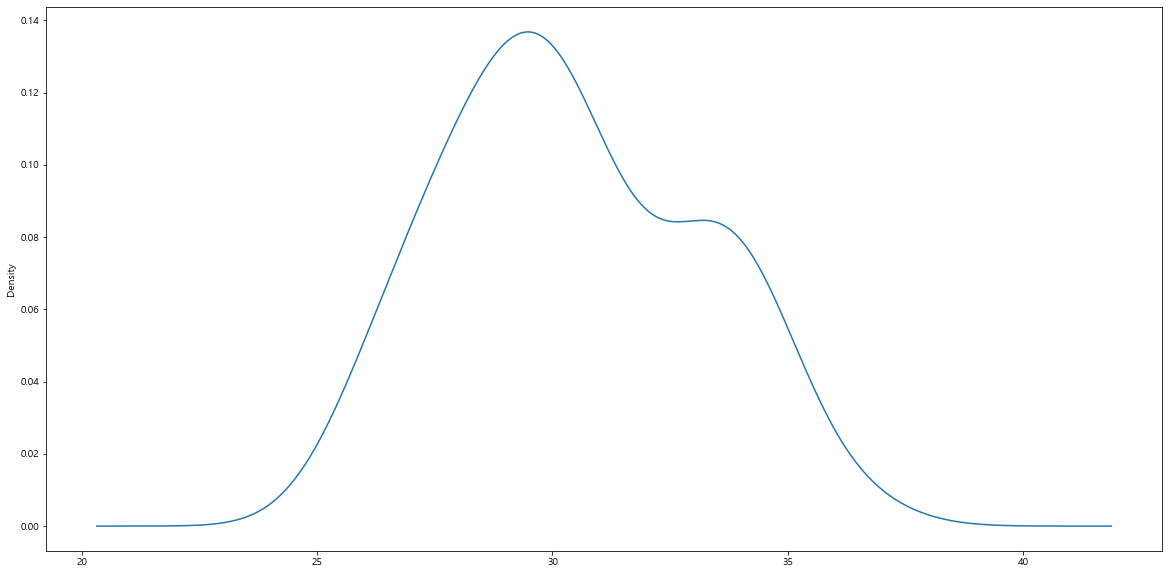

In [22]:
plt.figure(figsize=(20, 10)) 

ABC['Row_mean'].plot.kde()
print(plt.axis(option='auto'))
plt.show()

(-4.222928749279922,
 4.735999665075734,
 -0.018101431488941024,
 0.38013852776242646)

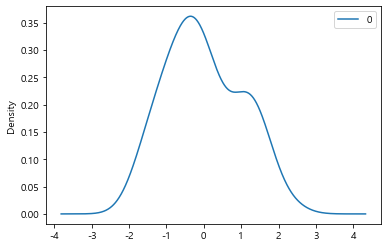

In [23]:
# Standardization

pd.DataFrame(stats.zscore(ABC['Row_mean'])).plot.kde()

plt.axis(option='auto')

[]

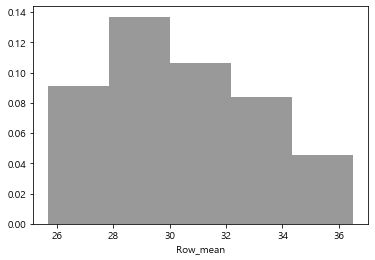

In [24]:
x = np.arange(start=1, stop=7, )

sns.distplot(ABC['Row_mean'], kde = False, norm_hist = True, color = 'black')
plt.plot()

In [25]:
x = np.linspace(-4.223,4.736,100)



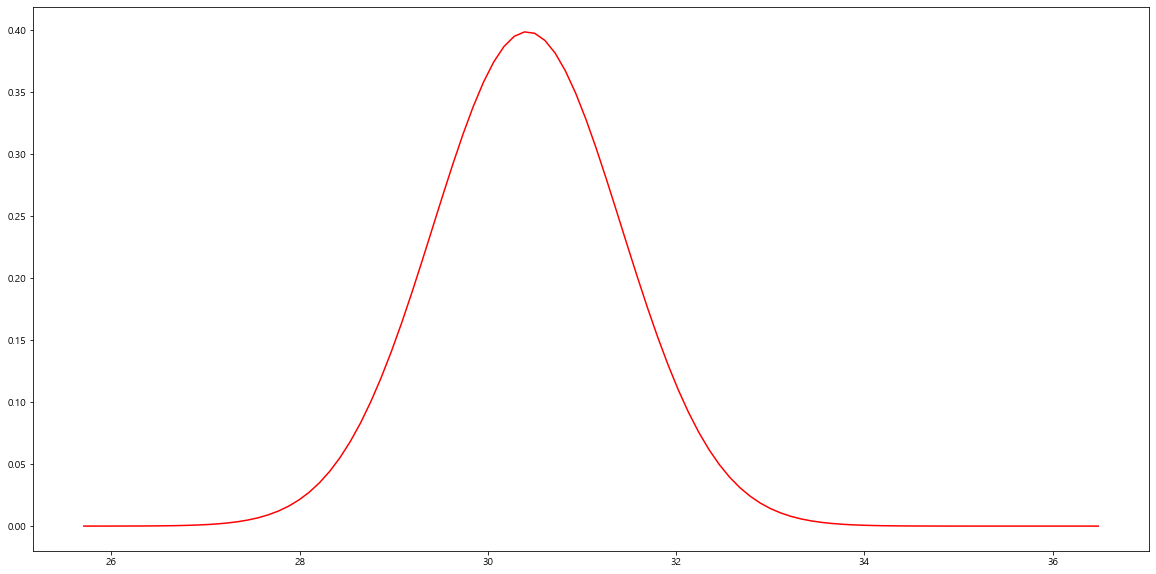

In [26]:
plt.figure(figsize=(20, 10)) 

n = sp.stats.norm(ABC['Row_mean'].mean(),1)
xv = np.linspace(ABC['Row_mean'].min(),ABC['Row_mean'].max(),100)
pdf = n.pdf(xv)

plt.plot(xv, pdf,color='red')

plt.show()

In [18]:
pd.DataFrame(np.linspace(ABC['Row_mean'].min(),ABC['Row_mean'].max(),101)).plot

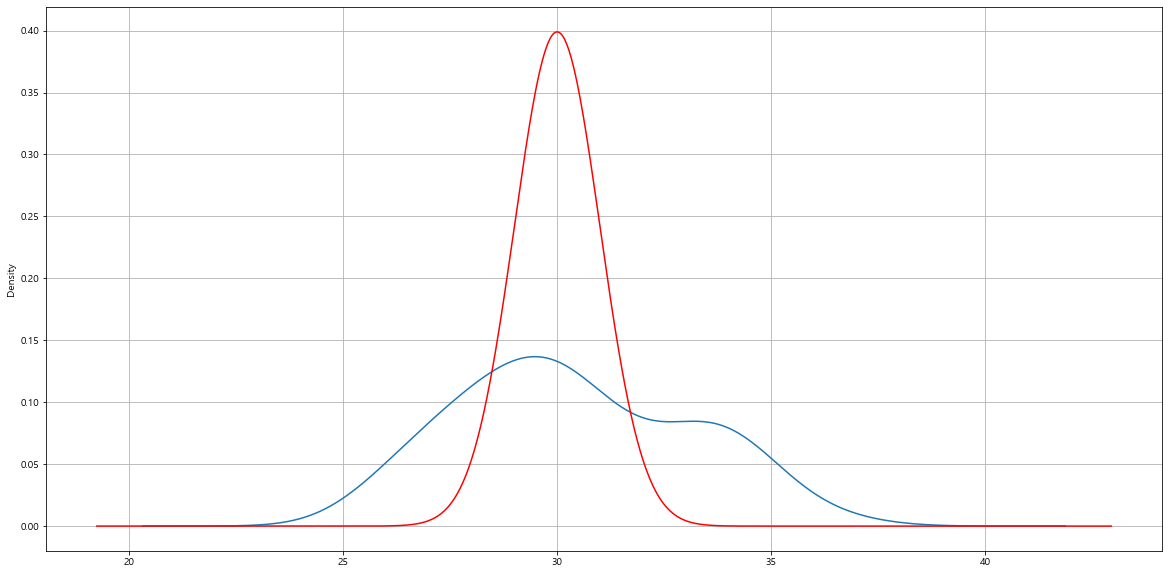

In [74]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

# Row_mean의 kernel density plot
ABC['Row_mean'].plot.kde()

# Row_mean 해당 범위의 정규분포
n = sp.stats.norm(30,1)
xv = np.linspace(19.23960716587681,42.953949137440745,1000)
pdf = n.pdf(xv)

plt.plot(xv, pdf,color='red')


# ABC['Row_mean'].plot.kde()
# print(plt.axis(option='auto'))







# plt.plot(ABC['Row_mean'])
# ax.plot(ABC.index, ABC['avg_5'],linewidth=35,color='skyblue')
# ax.plot(ABC.index, ABC['Row_mean'],linewidth=3,color='red')
# plt.xlabel('방영일')
# plt.ylabel('naver 검색량')
# plt.title('PPL : Naver')
# # annot : 'Row_mean'
# plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % ABC['Row_mean'][0])+')',
#             xy = (0+0.2, ABC['Row_mean'][0]+0.1),
#             xytext = (0+3, ABC['Row_mean'][0]+0.5),
#             ha = 'center',
#             arrowprops={'facecolor' : 'red'}
#             )
# # annot : 'avg_5'
# plt.annotate('이격도'+'\n'+'('+str('%.2f' % ABC['avg_5'][0])+')',
#             xy = (0+0.55, ABC['avg_5'][0]+0.4),
#             xytext = (0+3.2, ABC['avg_5'][0]+0.9),
#             ha = 'center',
#             arrowprops={'facecolor' : 'skyblue'}
#             )
plt.grid(True)

plt.show()

In [ ]:
"""
중심극한정리(中心極限定理, central limit theorem, CLT)는 동일한 확률분포를 가진 독립 확률 변수 n개의 평균의 분포는 n이 적당히 크다면 정규분포에 가까워진다는 정리입니다. 
-피에르시몽 라플라스

[출처] - https://m.blog.naver.com/PostView.nhn?blogId=parksehoon1971&logNo=221585313064&proxyReferer=https:%2F%2Fwww.google.com%2F
"""

In [ ]:
"""
베르누이 확률 변수(Bernoulli random variable):
    어떤 시행의 결과가 '성공', '실패' 중 하나로 나타나고,
    성공의 확률이 p, 실패할 확률이 1-p라고 할 때
    그 결과가 성공이면 확률 변수는 1을 갖고,
    결과가 실패면 확률 변수는 0을 갖는 확률 변수 x


PPL - '-30~30' 61개의 데이터 중 
'0'(or 0이후 1~2일)에서 튀어오를(성공) 확률?

[출처] - https://morningcoding.tistory.com/104
"""


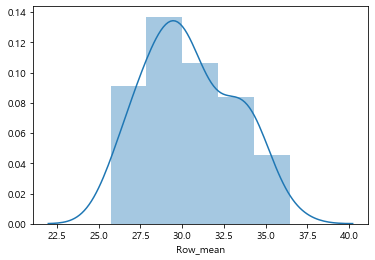

In [75]:
sns.distplot(ABC['Row_mean'])

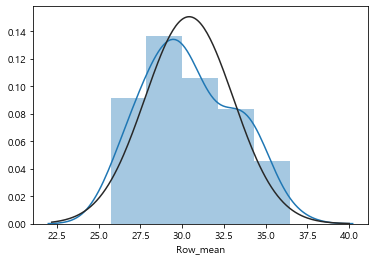

In [27]:
# ★★★★★★★★★★★★★★★★★★★
sns.distplot(ABC['Row_mean'], fit = stats.norm)

In [20]:
# 정규분포 형성

# m = ABC['Row_mean'].mean()
# s = 15

# x = np.linspace(m-3*s, m+3*s, 100)
# y = stats.norm.pdf(x, m, s)

# plt.xlim(ABC['Row_mean'].mean(),ABC['Row_mean'].max())
# plt.plot(x,y)
# plt.show()

In [21]:
# max = 36.48640132701422
# min = 25.70715497630334
# count = 61

ABC['Row_mean'].count()

61

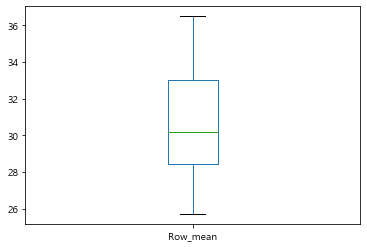

In [22]:
ABC['Row_mean'].plot(kind='box')

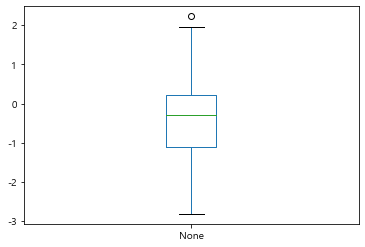

In [23]:
(ABC['Row_mean'] - ABC['avg_5']).plot(kind='box')

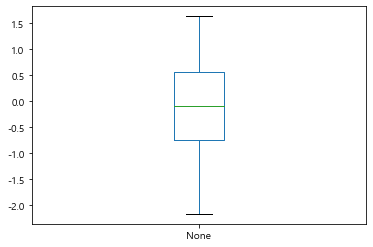

In [24]:
(ABC['Row_mean'] - ABC['avg_10']).plot(kind='box')

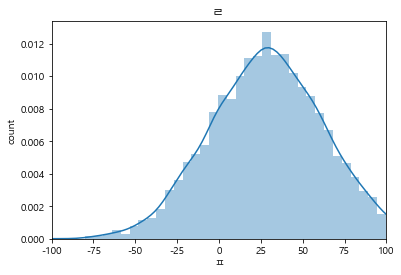

In [25]:
rv = sp.stats.norm(30,35)

sns.distplot(rv.rvs(size=10000, random_state=0))
plt.title("ㄹ")
plt.xlabel("ㅍ")
plt.ylabel("count")
plt.xlim(-100,100)
plt.show()

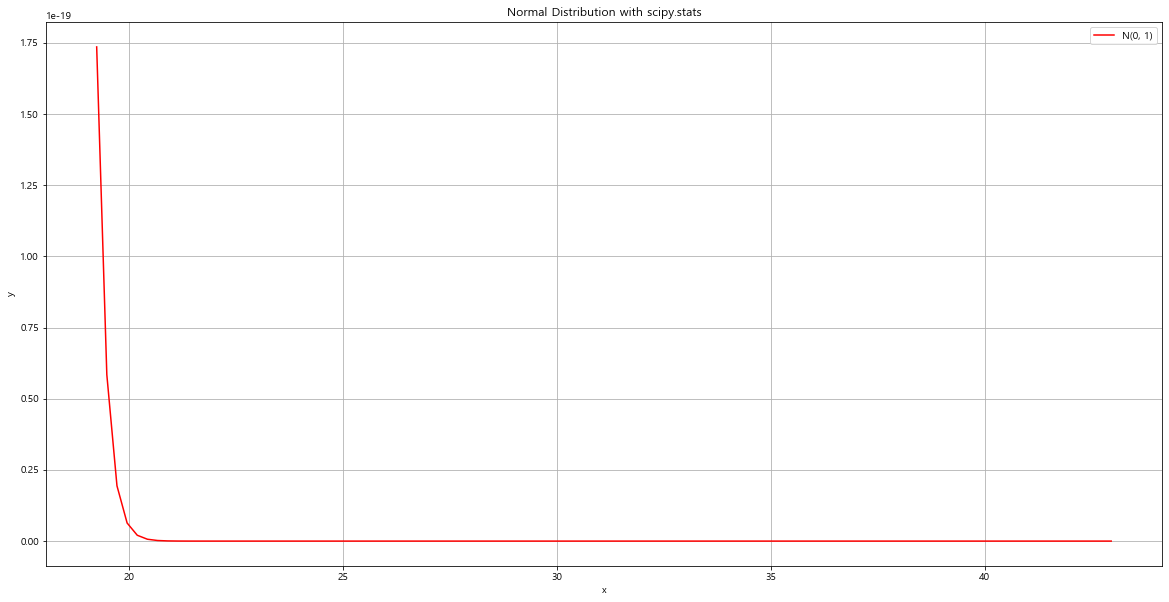

In [26]:
# ['Row_mean']의 정규분포
# scipy.stats as stats

y1 = stats.norm(1,2).pdf(x)


plt.figure(figsize=(20, 10))          # 플롯 사이즈 지정
plt.plot(x, y1, color="red")         # 선을 빨강색으로 지정하여 plot 작성          
plt.xlabel("x")                      # x축 레이블 지정
plt.ylabel("y")                      # y축 레이블 지정
plt.grid()                           # 플롯에 격자 보이기
plt.title("Normal Distribution with scipy.stats")     # 타이틀 표시
plt.legend(["N(0, 1)"])              # 범례 표시
plt.show()    

#[출처] [파이썬 데이터 사이언스] 정규분포(normal distribution) plot 그리기|작성자 박선생

In [64]:
mu = 0
std = 1
rv = sp.stats.norm(mu,std)
rv

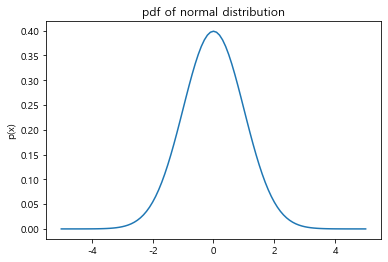

In [65]:
xx = np.linspace(-5, 5, 101)

plt.plot(xx, rv.pdf(xx))
plt.ylabel("p(x)")
plt.title("pdf of normal distribution")
# plt.xlim(0,10)
plt.show()

---

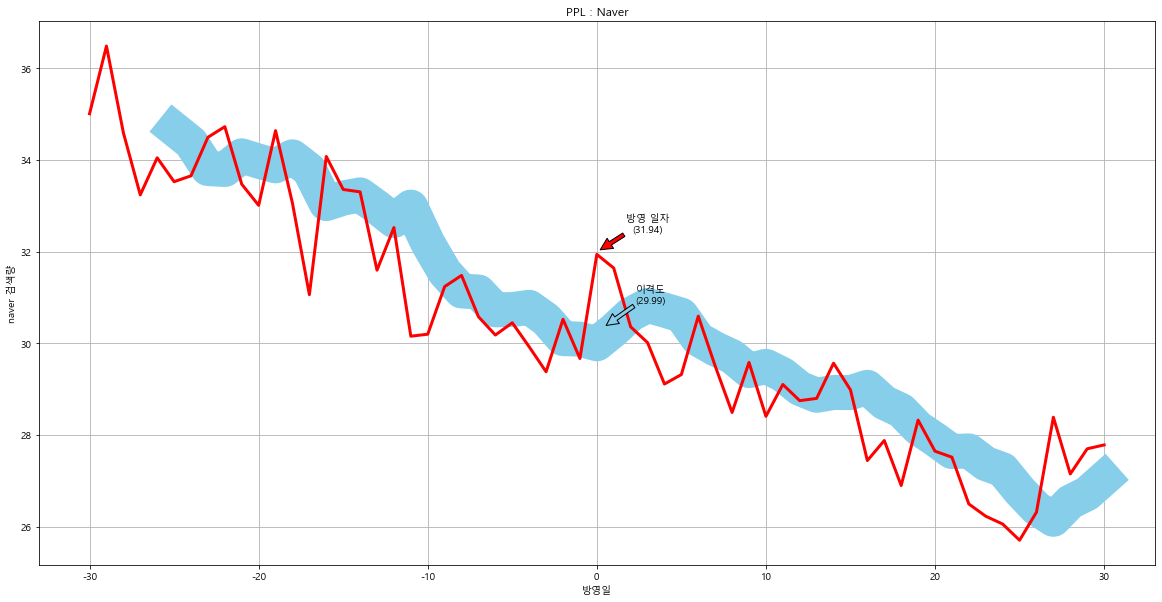

In [27]:
# avg_5


# plot 출력
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)


plt.plot(ABC['Row_mean'])
ax.plot(ABC.index, ABC['avg_5'],linewidth=35,color='skyblue')
ax.plot(ABC.index, ABC['Row_mean'],linewidth=3,color='red')
plt.xlabel('방영일')
plt.ylabel('naver 검색량')
plt.title('PPL : Naver')
# annot : 'Row_mean'
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % ABC['Row_mean'][0])+')',
            xy = (0+0.2, ABC['Row_mean'][0]+0.1),
            xytext = (0+3, ABC['Row_mean'][0]+0.5),
            ha = 'center',
            arrowprops={'facecolor' : 'red'}
            )
# annot : 'avg_5'
plt.annotate('이격도'+'\n'+'('+str('%.2f' % ABC['avg_5'][0])+')',
            xy = (0+0.55, ABC['avg_5'][0]+0.4),
            xytext = (0+3.2, ABC['avg_5'][0]+0.9),
            ha = 'center',
            arrowprops={'facecolor' : 'skyblue'}
            )
plt.grid(True)

plt.show()

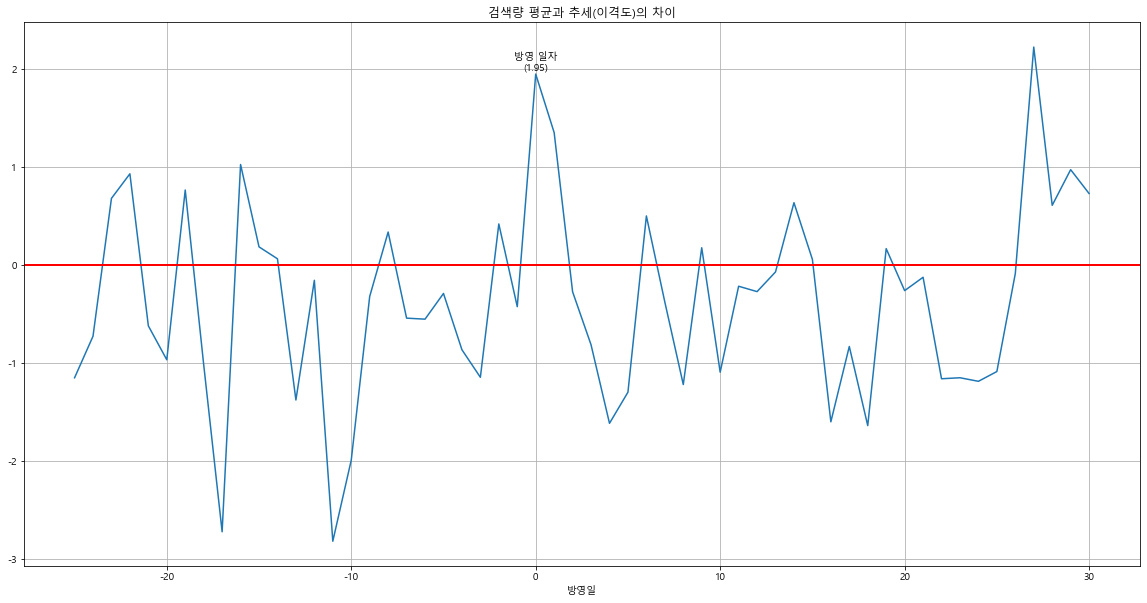

In [28]:
# avg_5


# 평균과 이격도의 차이
M_A = ABC['Row_mean'] - ABC['avg_5']

plt.figure(figsize=(20,10))
plt.title('검색량 평균과 추세(이격도)의 차이')

plt.plot(ABC['Row_mean'] - ABC['avg_5'])
plt.axhline(y=0, color='r', linewidth=2)

plt.xlabel('방영일')
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % M_A[0])+')',
            xy =(0,M_A[0]+0.04),
            ha = 'center')

plt.grid(True)

plt.show()

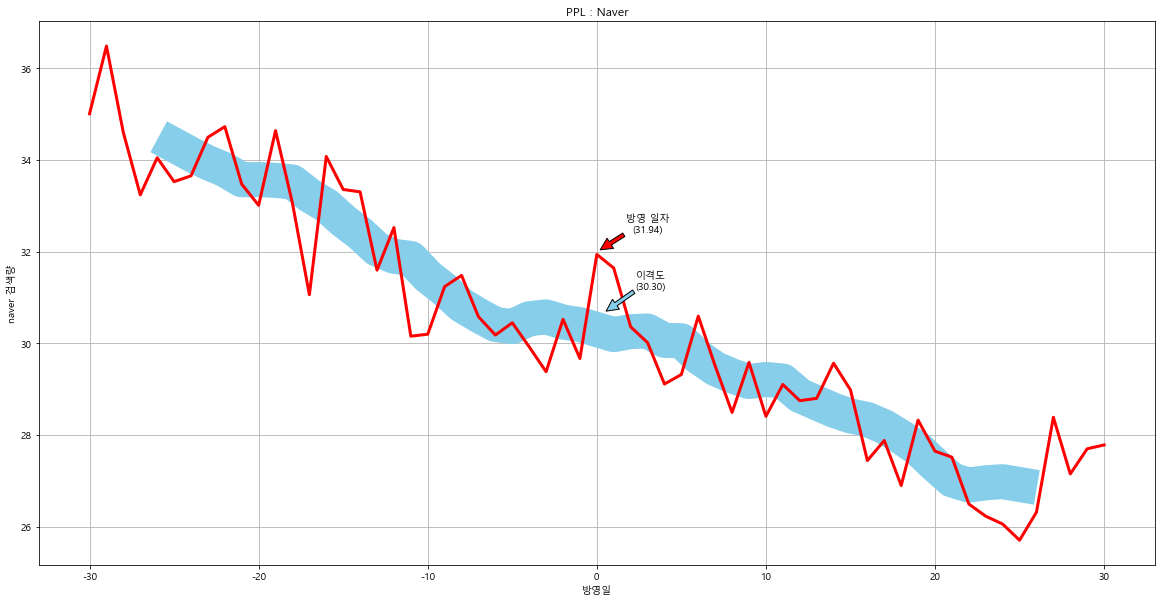

In [29]:
# avg_10


# plot 출력
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)


plt.plot(ABC['Row_mean'])
ax.plot(ABC.index, ABC['avg_10'],linewidth=35,color='skyblue')
ax.plot(ABC.index, ABC['Row_mean'],linewidth=3,color='red')
plt.xlabel('방영일')
plt.ylabel('naver 검색량')
plt.title('PPL : Naver')
# annot : 'Row_mean'
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % ABC['Row_mean'][0])+')',
            xy = (0+0.2, ABC['Row_mean'][0]+0.1),
            xytext = (0+3, ABC['Row_mean'][0]+0.5),
            ha = 'center',
            arrowprops={'facecolor' : 'red'}
            )
# annot : 'avg_10'
plt.annotate('이격도'+'\n'+'('+str('%.2f' % ABC['avg_10'][0])+')',
            xy = (0+0.55, ABC['avg_10'][0]+0.4),
            xytext = (0+3.2, ABC['avg_10'][0]+0.9),
            ha = 'center',
            arrowprops={'facecolor' : 'skyblue'}
            )
plt.grid(True)

plt.show()

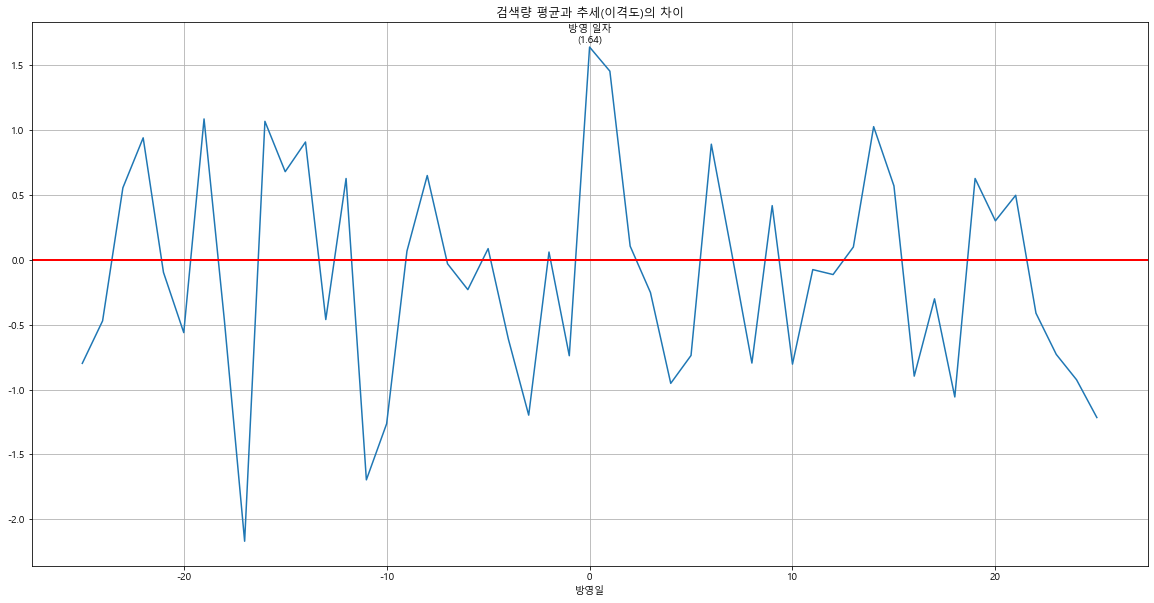

In [30]:
# avg_10


# 평균과 이격도의 차이
M_A = ABC['Row_mean'] - ABC['avg_10']

plt.figure(figsize=(20,10))
plt.title('검색량 평균과 추세(이격도)의 차이')

plt.plot(ABC['Row_mean'] - ABC['avg_10'])
plt.axhline(y=0, color='r', linewidth=2)

plt.xlabel('방영일')
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % M_A[0])+')',
            xy =(0,M_A[0]+0.04),
            ha = 'center')

plt.grid(True)

plt.show()

---
# 2시그마, 3시그마 만큼 제거... ( 진 행 중 . . )

In [28]:
ABC['Row_mean'].describe()

count    61.000000
mean     30.417727
std       2.668974
min      25.707155
25%      28.409523
50%      30.157587
75%      33.012111
max      36.486401
Name: Row_mean, dtype: float64

In [31]:
(ABC['Row_mean'] - ABC['Row_mean'].std()*2)

-30    29.671717
-29    31.148454
-28    29.258058
-27    27.902845
-26    28.711409
         ...    
 26    20.980653
 27    23.051807
 28    21.815102
 29    22.363585
 30    22.447969
Name: Row_mean, Length: 61, dtype: float64

In [31]:
(ABC['Row_mean'][5:]-ABC['avg_5'][5:]).mean()

-0.3595981013033183

# 결론 ( 브랜드명 & 품목 ) ★★★★★★ 수정필요 (avg_5,avg_10)
    
분석결과, 간접광고(PPL)는 Naver의 검색량에 영향을 주었다.  
영향 측정은 간접광고 방영 30일전, 당일, 30일후로 나누어  
모든 품목들의 해당일자의 '평균치(['Row_mean'])'를 만들었고,  
'평균치'가 유의미한지 추세를 제공하는지 알아보기 위해 '이격도(['avg_5'],['avg_10'])'를 사용하였다.  
'이격도'는 '평균치'의 5일(x-5), 10일(x-5,x+5)간의 평균으로 만들었다.  
  
 위의 분석을 통해서  
'간접광고'가 'Naver검색량'에 영향이 있음을 알 수 있었다.  
 해당기간 중 가장 높은 검색량은 다른 일자였지만  
단위기간 평균치와 추세선의 차(['Row_mean']-['avg_10'])에서  
방영 당일에 가장 높은 상승률(2.14)을 보였다.  
평균(-0.20)과 두 번째 최고치(1.42)를 비교해 봤을 때 . . .   
++++++++ 정확한 추세선의 범위 설정 가능?

# All Product(name)
'상품명'으로만 구성된 Dataframe

In [32]:
AP.head()

,Unnamed: 0,black dot E,overlay panel shirt (beige),스무스 리퀴드 아이라이너 브라운,[Drama Signature] Slim Bootcut Trousers_2colors,웨이스트 다트 재킷,네이비 스트라이프 v넥 트임 셔츠,스타착용 자켓 HKS29K7,단델리온,711 아시아 스키니 앵클 쿨진,...,Vertical space sweatshirt _ beige,매직 컨투어링 하이라이터,새틴 하이라이터 이탈프리즘,B.Intl Division Jacket,자켓 PKM39K2,Oversized hoodie zip up jumper,비엠비코 퀸79노블 골드세럼,데일리 아이마스크 장미향,보더 믹스 롱블라우스,3포켓 숏 퀼팅 점퍼 루즈핏
0,0,0,0,0,0,0,0,0,79.69543,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,91.37055,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,94.41624,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,67.00507,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,76.14213,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
AP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Columns: 470 entries, Unnamed: 0 to 3포켓 숏 퀼팅 점퍼 루즈핏
dtypes: float64(64), int64(406)
memory usage: 224.1 KB


In [34]:
sum(AP.isnull().sum())

0

In [35]:
# row별(445개) 평균 컬럼 추가

Row_mean = []
for i in range(0,len(AP.index)):
    Row_mean.append(AP.iloc[i].mean())
Row_mean = pd.DataFrame(Row_mean)
AP['Row_mean'] = Row_mean
AP.columns


Index(['Unnamed: 0', 'black dot E', 'overlay panel shirt (beige)',
       '스무스 리퀴드 아이라이너 브라운', '[Drama Signature] Slim Bootcut Trousers_2colors',
       '웨이스트 다트 재킷', '네이비 스트라이프 v넥 트임 셔츠', '스타착용 자켓 HKS29K7', '단델리온 ',
       '711 아시아 스키니 앵클 쿨진',
       ...
       '매직 컨투어링 하이라이터', '새틴 하이라이터 이탈프리즘', 'B.Intl Division Jacket',
       '자켓 PKM39K2', 'Oversized hoodie zip up jumper', '비엠비코 퀸79노블 골드세럼',
       '데일리 아이마스크 장미향', '보더 믹스 롱블라우스', '3포켓 숏 퀼팅 점퍼 루즈핏', 'Row_mean'],
      dtype='object', length=471)

In [36]:
# 이격도 제작
# ['Row_mean']의 5일간격 평균치

avg_5 = []
for i in range(0,len(AP['Row_mean'])):
    avg_5.append(AP['Row_mean'][i-5:i].mean())
avg_5 = pd.DataFrame(avg_5)
avg_5
AP['avg_5'] = avg_5
AP.columns

Index(['Unnamed: 0', 'black dot E', 'overlay panel shirt (beige)',
       '스무스 리퀴드 아이라이너 브라운', '[Drama Signature] Slim Bootcut Trousers_2colors',
       '웨이스트 다트 재킷', '네이비 스트라이프 v넥 트임 셔츠', '스타착용 자켓 HKS29K7', '단델리온 ',
       '711 아시아 스키니 앵클 쿨진',
       ...
       '새틴 하이라이터 이탈프리즘', 'B.Intl Division Jacket', '자켓 PKM39K2',
       'Oversized hoodie zip up jumper', '비엠비코 퀸79노블 골드세럼', '데일리 아이마스크 장미향',
       '보더 믹스 롱블라우스', '3포켓 숏 퀼팅 점퍼 루즈핏', 'Row_mean', 'avg_5'],
      dtype='object', length=472)

In [37]:
# 이격도 제작('avb_10')
# ['Row_mean']의 10일간격(해당일 전후5일) 평균치

avg_10 = []
for i in range(0,len(AP['Row_mean'])):
    avg_10.append(AP['Row_mean'][i-5:i+5].mean())
avg_10 = pd.DataFrame(avg_10)
avg_10.head(10)
AP['avg_10'] = avg_10
AP['avg_10'][56:61] = np.nan

AP.columns

Index(['Unnamed: 0', 'black dot E', 'overlay panel shirt (beige)',
       '스무스 리퀴드 아이라이너 브라운', '[Drama Signature] Slim Bootcut Trousers_2colors',
       '웨이스트 다트 재킷', '네이비 스트라이프 v넥 트임 셔츠', '스타착용 자켓 HKS29K7', '단델리온 ',
       '711 아시아 스키니 앵클 쿨진',
       ...
       'B.Intl Division Jacket', '자켓 PKM39K2',
       'Oversized hoodie zip up jumper', '비엠비코 퀸79노블 골드세럼', '데일리 아이마스크 장미향',
       '보더 믹스 롱블라우스', '3포켓 숏 퀼팅 점퍼 루즈핏', 'Row_mean', 'avg_5', 'avg_10'],
      dtype='object', length=473)

In [38]:
# 방영일자(0~60)을 (-30~0~30) 으로 변경
AP.index = np.arange(-30,31)
AP.head()

,Unnamed: 0,black dot E,overlay panel shirt (beige),스무스 리퀴드 아이라이너 브라운,[Drama Signature] Slim Bootcut Trousers_2colors,웨이스트 다트 재킷,네이비 스트라이프 v넥 트임 셔츠,스타착용 자켓 HKS29K7,단델리온,711 아시아 스키니 앵클 쿨진,...,B.Intl Division Jacket,자켓 PKM39K2,Oversized hoodie zip up jumper,비엠비코 퀸79노블 골드세럼,데일리 아이마스크 장미향,보더 믹스 롱블라우스,3포켓 숏 퀼팅 점퍼 루즈핏,Row_mean,avg_5,avg_10
-30,0,0,0,0,0,0,0,0,79.69543,0,...,0,0,0,0,0,0,0,4.437738,NaN,NaN
-29,1,0,0,0,0,0,0,0,91.37055,0,...,0,0,0,0,0,0,0,4.658061,NaN,NaN
-28,2,0,0,0,0,0,0,0,94.41624,0,...,0,0,0,0,0,0,0,5.301240,NaN,NaN
-27,3,0,0,0,0,0,0,0,67.00507,0,...,0,0,0,0,0,0,0,4.360117,NaN,NaN
-26,4,0,0,0,0,0,0,0,76.14213,0,...,0,0,0,0,0,0,0,4.932616,NaN,NaN


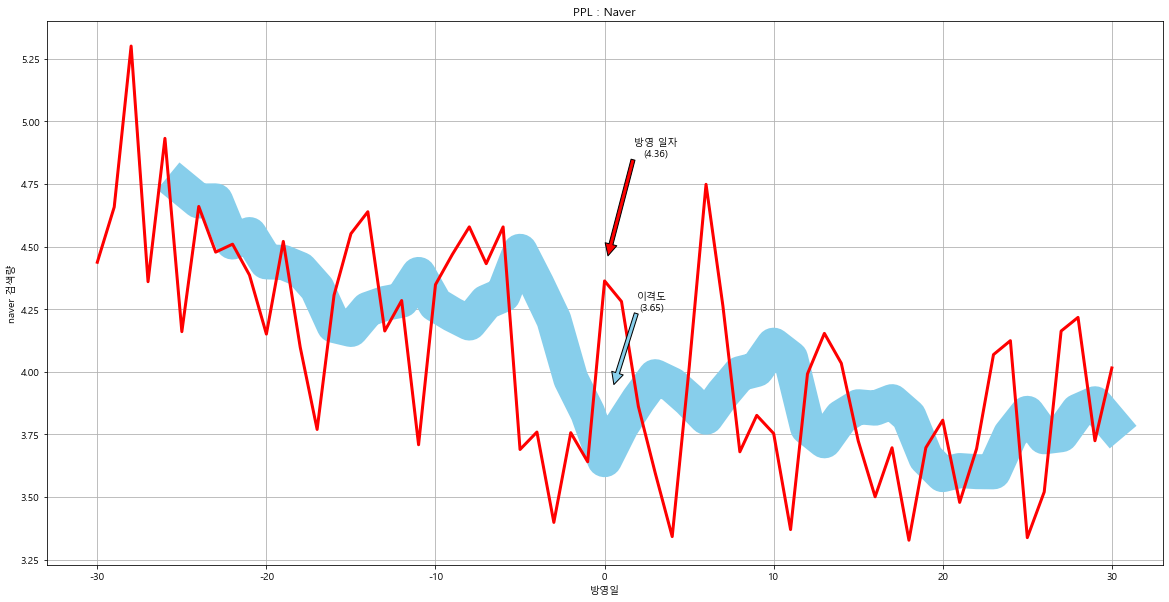

In [39]:
# avg_5


# plot 출력

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)


plt.plot(AP['Row_mean'])
ax.plot(AP.index, AP['avg_5'],linewidth=35,color='skyblue')
ax.plot(AP.index, AP['Row_mean'],linewidth=3,color='red')
plt.xlabel('방영일')
plt.ylabel('naver 검색량')
plt.title('PPL : Naver')
# annot : 'Row_mean'
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % AP['Row_mean'][0])+')',
            xy = (0+0.2, AP['Row_mean'][0]+0.1),
            xytext = (0+3, AP['Row_mean'][0]+0.5),
            ha = 'center',
            arrowprops={'facecolor' : 'red'}
            )
# annot : 'avg_5'
plt.annotate('이격도'+'\n'+'('+str('%.2f' % AP['avg_5'][0])+')',
            xy = (0+0.55, AP['avg_5'][0]+0.3),
            xytext = (0+2.8, AP['avg_5'][0]+0.6),
            ha = 'center',
            arrowprops={'facecolor' : 'skyblue'}
            )
plt.grid(True)

plt.show()

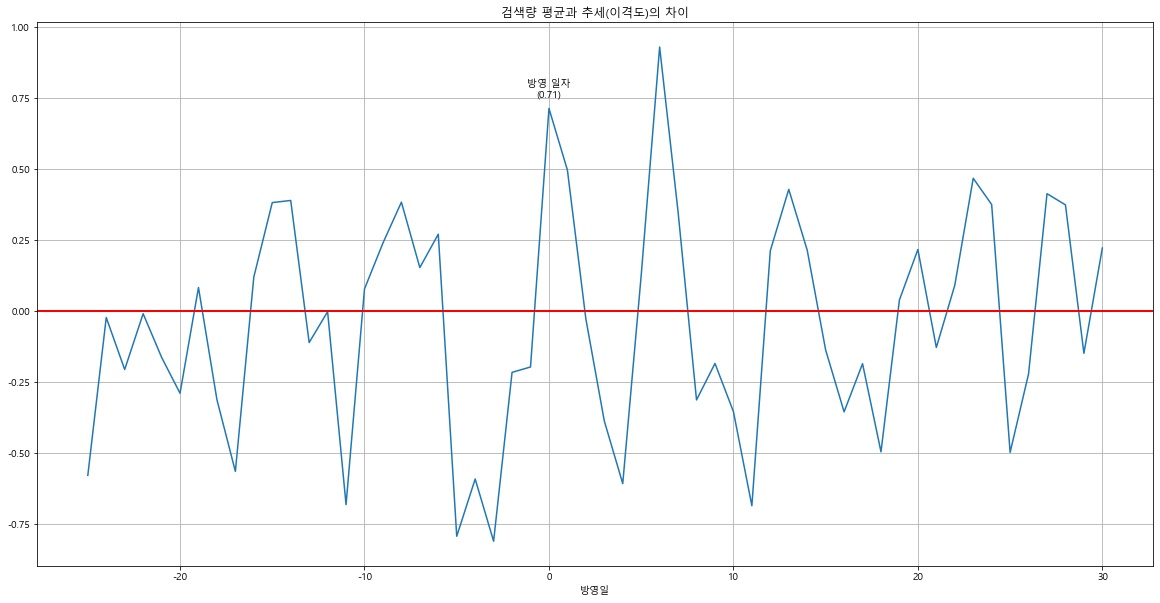

In [40]:
# 평균과 이격도의 차이
M_A = AP['Row_mean'] - AP['avg_5']

plt.figure(figsize=(20,10))
plt.title('검색량 평균과 추세(이격도)의 차이')

plt.plot(AP['Row_mean'] - AP['avg_5'])
plt.axhline(y=0, color='r', linewidth=2)

plt.xlabel('방영일')
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % M_A[0])+')',
            xy =(0,M_A[0]+0.04),
            ha = 'center')

plt.grid(True)

plt.show()

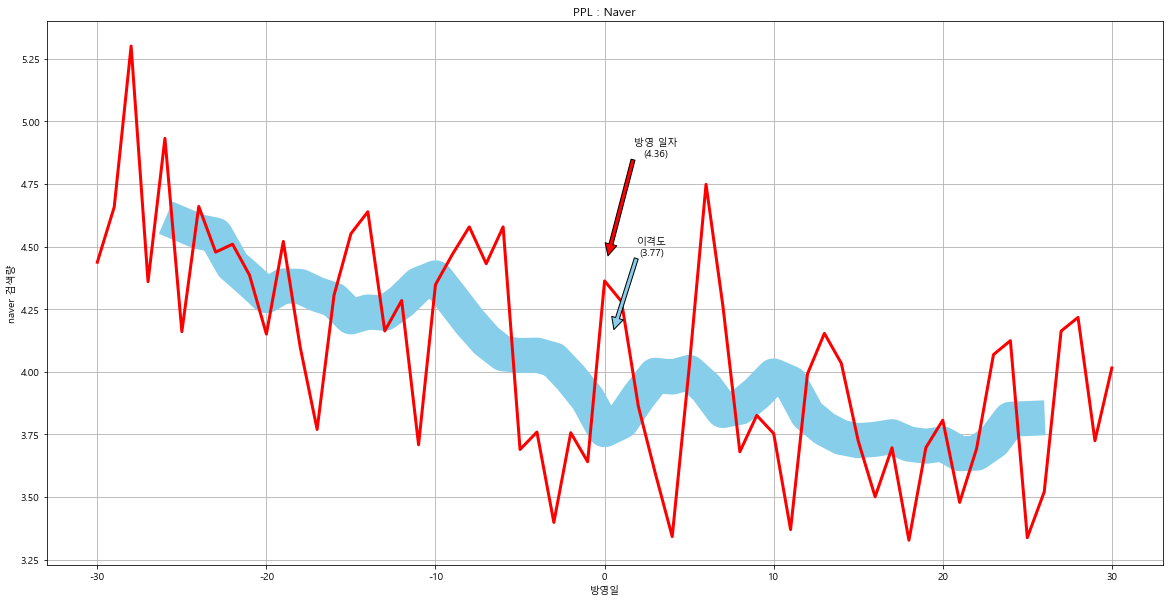

In [41]:
# avg_10


# plot 출력
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)


plt.plot(AP['Row_mean'])
ax.plot(AP.index, AP['avg_10'],linewidth=35,color='skyblue')
ax.plot(AP.index, AP['Row_mean'],linewidth=3,color='red')
plt.xlabel('방영일')
plt.ylabel('naver 검색량')
plt.title('PPL : Naver')
# annot : 'Row_mean'
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % AP['Row_mean'][0])+')',
            xy = (0+0.2, AP['Row_mean'][0]+0.1),
            xytext = (0+3, AP['Row_mean'][0]+0.5),
            ha = 'center',
            arrowprops={'facecolor' : 'red'}
            )
# annot : 'avg_10'
plt.annotate('이격도'+'\n'+'('+str('%.2f' % AP['avg_10'][0])+')',
            xy = (0+0.55, AP['avg_10'][0]+0.4),
            xytext = (0+2.8, AP['avg_10'][0]+0.7),
            ha = 'center',
            arrowprops={'facecolor' : 'skyblue'}
            )
plt.grid(True)

plt.show()

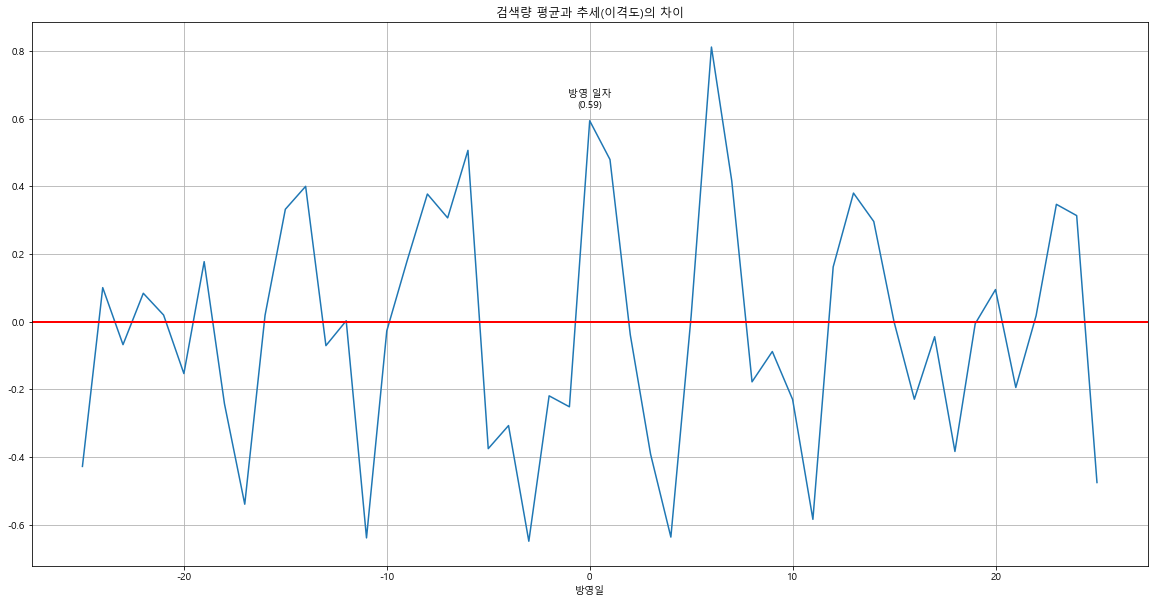

In [42]:
# 평균과 이격도의 차이
M_A = AP['Row_mean'] - AP['avg_10']

plt.figure(figsize=(20,10))
plt.title('검색량 평균과 추세(이격도)의 차이')

plt.plot(AP['Row_mean'] - AP['avg_10'])
plt.axhline(y=0, color='r', linewidth=2)

plt.xlabel('방영일')
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % M_A[0])+')',
            xy =(0,M_A[0]+0.04),
            ha = 'center')

plt.grid(True)

plt.show()

# 결론 ( 상품명 )

### t-test(anova) , median    
분석결과, 간접광고(PPL)는 Naver의 검색량에 영향을 주었다.  
영향 측정은 간접광고 방영 전후 30일전, 당일, 30일후로 나누어  
모든 품목들의 해당일자의 '평균치(['Row_mean'])'를 만들었고,  
'평균치'가 유의미한지 추세를 제공하는지 알아보기 위해 '이격도(['avg_5'],['avg_10'])'를 사용하였다.  
'이격도'는 '평균치'의 5일간의 평균으로 만들었다.  
  
위의 분석을 통해서  
간접광고가 상품명의 검색에는 영향력이 유의미하게 발견되지 않았다.

# 최종 결론
    
PPL과  Naver검색의 상관성에대한 분석.  
1. 브랜드이름, 품목으로 검색  
2. 상품명으로 검색  
  
 공통적으로 두 모델 모두 단위 기간의 추세에 대해서  
상승세를 보였다. ( PPL이 Naver검색량에 영향이 있음 )  
 하지만 '1.'과 '2.'로 나누어서 분석해본 결과가 같은 단위기간임을 감안했을 때,  
검색 수단으로 정확한 상품명을 검색하기 보다는  
그 브랜드명, 혹은 품목을 검색하는 경우가 많았다고 분석할 수 있다.
  
'해당 분석'에서 알 수 없는 다른 요인에 의한 검색량 폭등('1.'과 '2.'에서)과  
PPL의 영향력(방영당일 상승폭)에 대해서 비교 해봤을 때,  
간접광고의 궁극적인 목적이  
구전, 인지도 상승으로는 적합하지 않다고 볼 수 있다.
